In [1]:
import pandas as pd
import nltk
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, PrecisionRecallDisplay

from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from stop_words import get_stop_words

In [2]:
dataset = pd.read_csv('corpora.csv')

In [ ]:
from deep_translator import GoogleTranslator
import pandas as pd

#Import the data
dataset = pd.read_csv('corpora.csv')

#Translate the document into english - this might be an optional
dataset['text_en'] = [GoogleTranslator(source = 'norwegian', target = 'english').translate(text[0:4999]) for text in dataset.text]

dataset.to_csv('corpora_en.csv')

In [ ]:
count_codes = dataset.groupby('code').count()
sorted_list = count_codes.sort_values(by = 'text', ascending = False)

([], [])

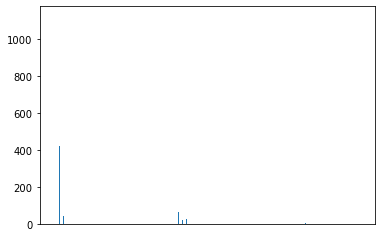

In [8]:
%matplotlib inline
plt.hist(dataset.code, bins = dataset.code.shape[0])
plt.xticks([], [])

In [3]:
count_codes = dataset.groupby('code').count()
sorted_list = count_codes.sort_values(by = 'text', ascending = False)

#Divide training and testing sets
train, test = train_test_split(dataset, test_size = 0.2)

Y_train = train.code.values
Y_test = test.code.values

stop_words_norway = get_stop_words('norwegian')

tfidf_vectorizer = TfidfVectorizer(max_df=0.98, norm = 'l2', stop_words=stop_words_norway)
tfidf_vectorizer.fit_transform(train.text.values)

X_train = tfidf_vectorizer.transform(train.text.values)
X_test = tfidf_vectorizer.transform(test.text.values)


In [11]:
scikit_log_reg = LogisticRegression(verbose = 1,
                                    solver='liblinear',
                                    random_state = 0,
                                    C = 10000, 
                                    penalty='l2')

In [12]:
model = scikit_log_reg.fit(X_train, Y_train)

[LibLinear]

In [13]:
labels_train = model.predict(X_train)

In [14]:
labels_test = model.predict(X_test)

In [8]:
accuracy_train = np.sum([Y_train[i] == labels_train[i] for i, key in enumerate(Y_train)])/np.sum(Y_train == Y_train)

accuracy_test = np.sum([Y_test[i] == labels_test[i] for i, key in enumerate(Y_test)])/np.sum(Y_test == Y_test)

mat = confusion_matrix(labels_test, Y_test)

print('test: ' , accuracy_train, ' train: ',  accuracy_test)

test:  0.9956754530477759  train:  0.7390856672158155


In [10]:
import pickle 

filename = 'finalized_model_liblinear_C1000.sav'

pickle.dump(model, open(filename, 'wb'))